<a href="https://colab.research.google.com/github/PervejHosen/Time_Series/blob/main/Time_Series_forecasting_(End_to_End_Projects).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting (End to End Projects)

**we will work on almost all available techniques including:**

**1.** **Time Series analysis with pandas**

   * Working with datetime index
   * date_range to create range of dates
   * Resampling the data
   * Shifting and Rolling
   
**2.** **Time Series analysis with Statsmodels**

   * Using statsmodels to get the trend, plot the data
   * ETS Models ( Error, Trend, Seasonality)
   * Seasonal Decomposition
   * Moving Averages- Simple Moving Averages, Holten winters method, Exponential moving averages,    Simple exponential smoothing, Double exponential smooting.
   
**3.** **General forecasting models**

   * Forecasting with holt winters method
   * Stationarity
   * Differencing
   * Autocorrelation ACF, PACF
   * Augmented Dickey-Fuller Test
   
**4. Introduction to ARIMA models**

   * Choosing ARIMA orders, auto_arima (pmdarima)
   * ARIMA
   * SARIMA
   * Model building and predictions
   * plotting


# 1.Time Series with Pandas

###**1.1 Datetime Index**

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
from IPython.display import Image

###**1.2 How to get a series of dates with numpy**

In [2]:
dates=np.arange('2020-01-01', '2020-01-31',  dtype='datetime64[D]')
dates

array(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
       '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
       '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
       '2020-01-29', '2020-01-30'], dtype='datetime64[D]')

**Info:**
* As seen above, arange gave us all the days between start and end dates

**Note:**
* we can also add "step size" to give us only the desired dates after each step size.
* 10 is number of days as "D" is mentioned in datetime type

In [3]:
dates=np.arange('2020-01-01', '2020-01-31', 10, dtype='datetime64[D]')
dates

array(['2020-01-01', '2020-01-11', '2020-01-21'], dtype='datetime64[D]')

###**1.3 Pandas date_range**

In [4]:
dates=pd.date_range('2020-01-01', periods=7, freq='D')
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

**Info:**
* It also gave similar results and we only had to specify start date, with periods and frequency.

###**1.4 Time Resampling**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data=pd.read_csv('/content/drive/MyDrive/Python/Datasets/Time Series/starbucks.csv')
data.head()

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1006 non-null   object 
 1   Close   1006 non-null   float64
 2   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.7+ KB


**Info:**
*  we can see above that 'Date' column is not a datetime object.
* We can use 2 methods to make it a date column.
    1. Either during importing, we set parse_dates=True and index_col='Date'
    2. set index of the dataframe to 'Date' and convert 'Date' to datetime object using pandas to_datetime

In [8]:
data['Date']=pd.to_datetime(data['Date'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1006 non-null   datetime64[ns]
 1   Close   1006 non-null   float64       
 2   Volume  1006 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.7 KB


**Info:**
* See, now 'Date' column has been converted to datetime object.
* Now let's set this column as index.

In [10]:
data=data.set_index('Date')
data.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [11]:
data.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

**Info:**
* This is a daily data as you can see from dates.
* However, we can use resampling to convert into `weekly, monthly or yearly` as per our requirement.

**Daily to Yearly**

In [12]:
# daily to yearly
data.resample('A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [13]:
data.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


**Let's resample only a series column and plot it**

<Axes: xlabel='Date'>

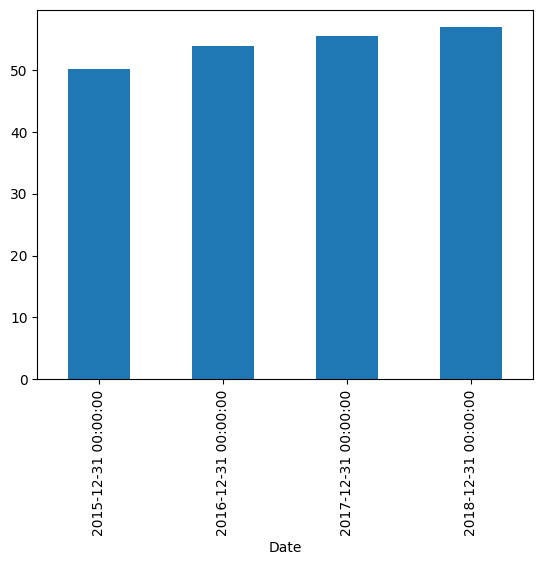

In [14]:
# Let's resample only a series column and plot it

data['Close'].resample('A').mean().plot(kind='bar')

**Info:**
* Below are the aliases which you can use while resampling for example "A" means `resample to yearly`

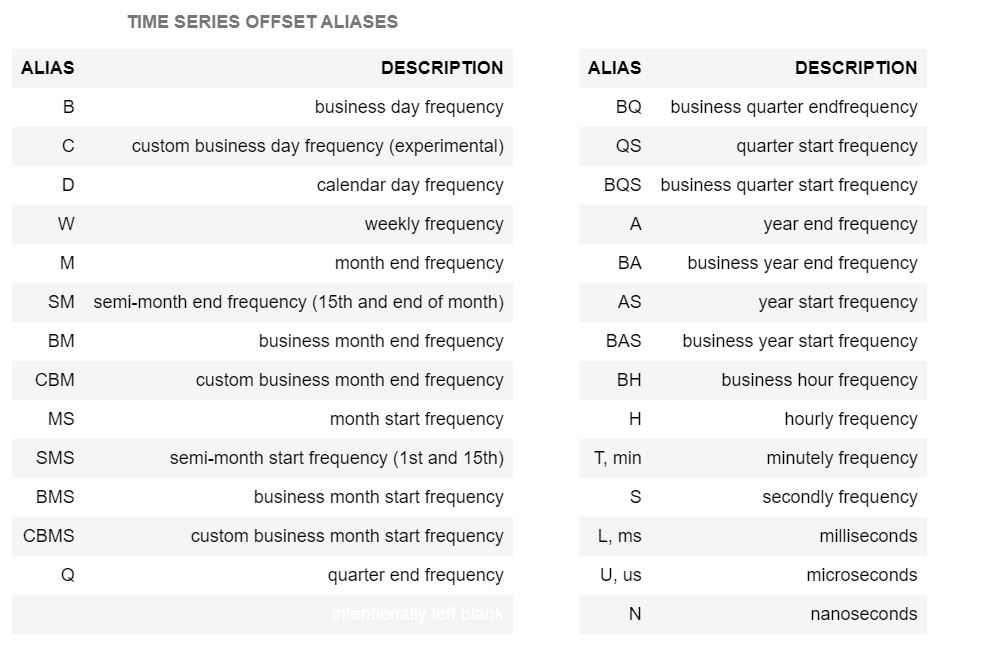

###**1.4 Shifting and rolling**

##### **Shifting**

* shifting means time shifting the whole dataframe or a particular series by 1 up or down

In [15]:
data.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [16]:
data.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


**Info:**
* data has been shifted downwards.
* Hence, first row becomes blank and last row gets pruned.
* Similarly shift(-1) will shift the data upwards

##### **Rolling**
* We can create a rolling mean dataframe or series using rolling method.
* We need to specify the window size and mean will be created according to the window size.
* For ex: window size of 6 means, it will take the first 6 samples and create a mean value and them move from second sample to next 6 and so on.

In [17]:
data.rolling(window=3).mean().head()
# Notice that first 2 values are NAN hence sampling mean of 3 samples will start only from the 3rd sample

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,37.419667,8.731411e+06
2015-01-07,37.379233,9.673563e+06
2015-01-08,37.785233,1.018915e+07


<Axes: xlabel='Date'>

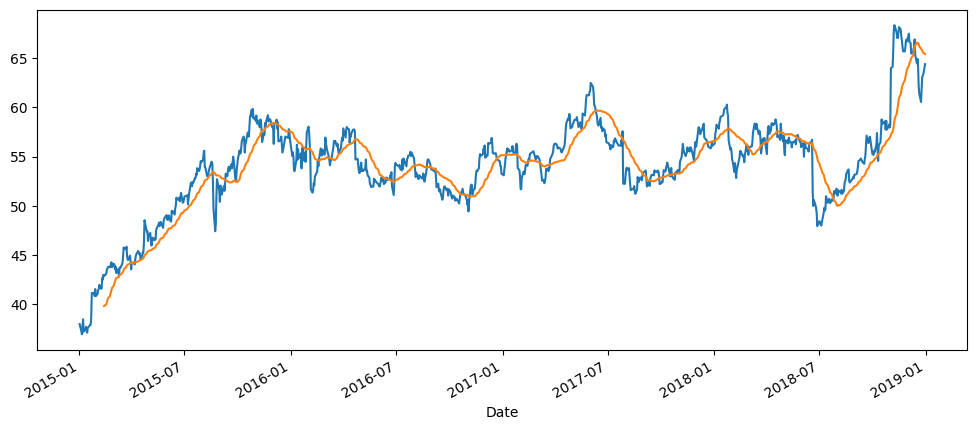

In [18]:
data['Close'].plot(figsize=(12,5))
data['Close'].rolling(window=30).mean().plot()

**Info:**
* we can also limit the data before plotting if we want to focus only towards a particular interval.

**Let's see below**

#### **Choosing X limits by Slice**

* Here we only focus on the plot containing the data from 2016-2017.
* We can also limit the data in the plot itself using xlim and ylim but i suggest to limit the data before plotting.

<Axes: xlabel='Date'>

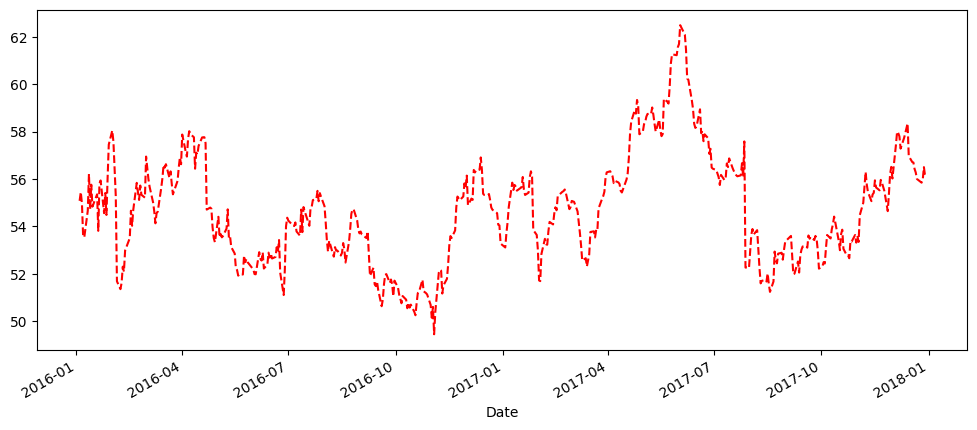

In [19]:
data['Close']['2016-01-01':'2017-12-31'].plot(figsize=(12,5), ls='--', color='red')

#### **Choosing X limits by Slice**

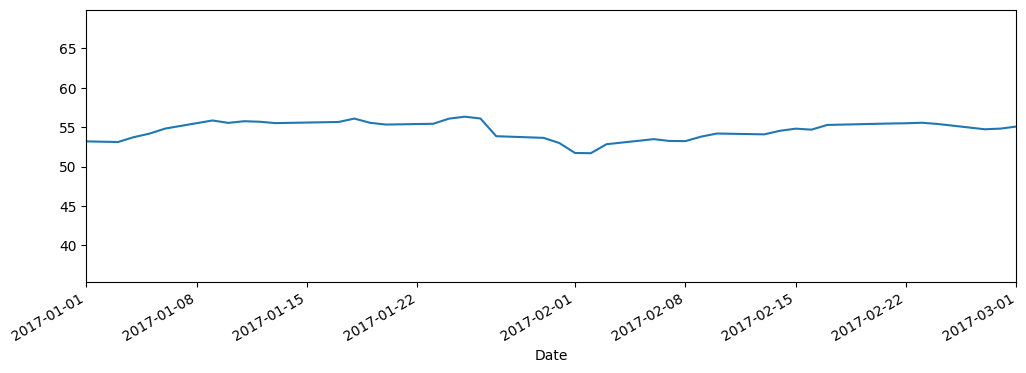

In [20]:
# Dates are separated by a comma:
data['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01']);

# **2.Time Series analysis with Statsmodels**

#### **Introduction to Statsmodels**
Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at statsmodels.org. The statsmodels version used in the development of this course is 0.9.0.

### **Statsmodels**

In [21]:
df = pd.read_csv('/content/drive/MyDrive/Python/Datasets/Time Series/macrodata.csv',index_col=0,parse_dates=True)
df.head()

,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
year,,,,,,,,,,,,,
1959-01-01,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-01-01,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-01-01,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-01-01,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-01-01,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### **Plot the data**

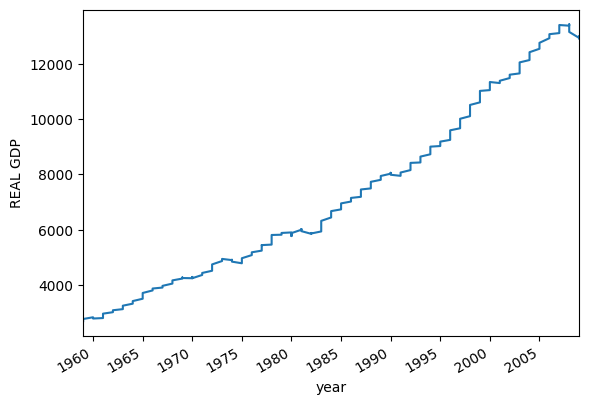

In [22]:
ax = df['realgdp'].plot()
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='REAL GDP');

### **2.1 Using statsmodels to get the trend**

* The Hodrick-Prescott filter separates a time-series  𝑦𝑡  into a trend component  𝜏𝑡  and a cyclical component 𝑐𝑡,
    `𝑦𝑡=𝜏𝑡+𝑐𝑡 `
* The components are determined by minimizing the following quadratic loss function, where  𝜆  is a smoothing parameter:

  `min𝜏𝑡∑𝑇𝑡=1𝑐2𝑡+𝜆∑𝑇𝑡=1[(𝜏𝑡−𝜏𝑡−1)−(𝜏𝑡−1−𝜏𝑡−2)]2 `

* The  𝜆  value above handles variations in the growth rate of the trend component.
* When analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data.

In [23]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

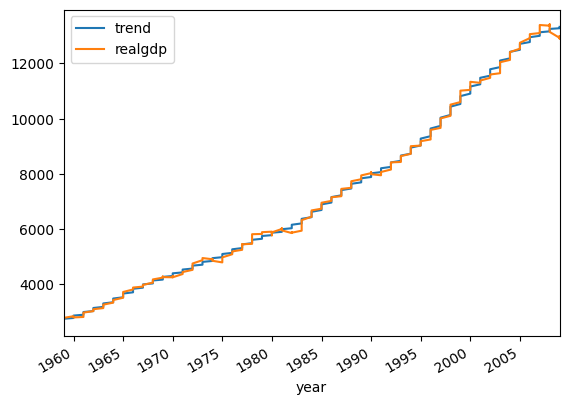

In [24]:
df['trend'] = gdp_trend
df[['trend','realgdp']].plot().autoscale(axis='x',tight=True);

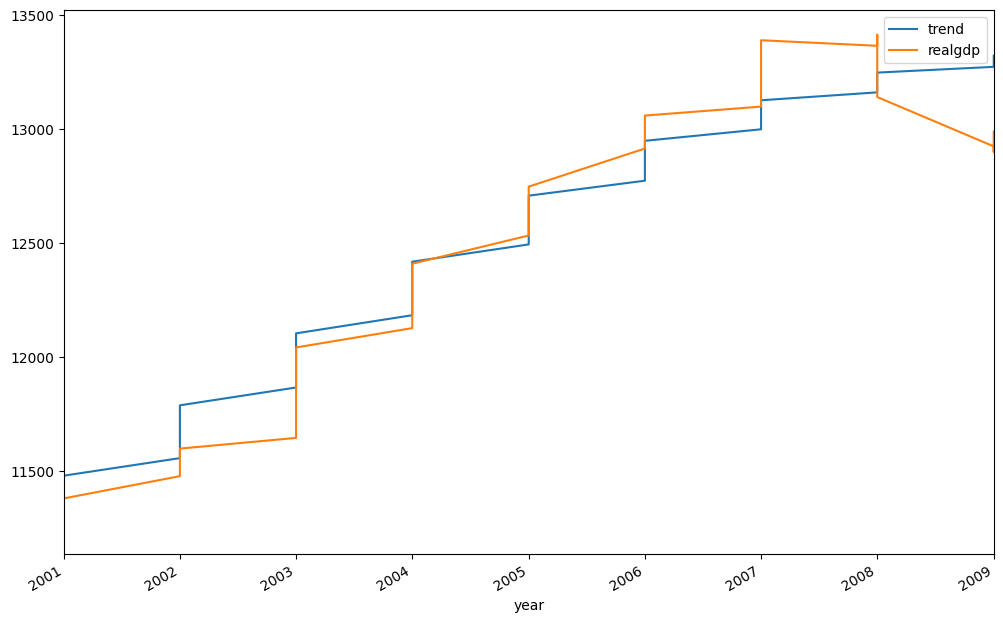

In [25]:
df[['trend','realgdp']]['2000-03-31':].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

### **ETS**

### **2.2 ETS Models ( Error, Trend, Seasonality)**
* Exponential smooting
* Trend methods models
* ETS Decomposition

As we begin working with endogenous data ("endog" for short) and start to develop forecasting models, it helps to identify and isolate factors working within the system that influence behavior. Here the name "endogenous" considers internal factors, while "exogenous" would relate to external forces. These fall under the category of state space models, and include decomposition (described below), and exponential smoothing (described in an upcoming section).

The decomposition of a time series attempts to isolate individual components such as error, trend, and seasonality (ETS). We've already seen a simplistic example of this in the Introduction to Statsmodels section with the Hodrick-Prescott filter. There we separated data into a trendline and a cyclical feature that mapped observed data back to the trend.

### **2.3 Seasonal Decomposition**
* Statsmodels provides a `seasonal decomposition` tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.


* We apply an **additive** model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).

* A **multiplicative** model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [28]:
airline = pd.read_csv('/content/drive/MyDrive/Python/Datasets/Time Series/airline-passengers.csv',index_col='Month',parse_dates=True)
airline.dropna(inplace=True)
airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


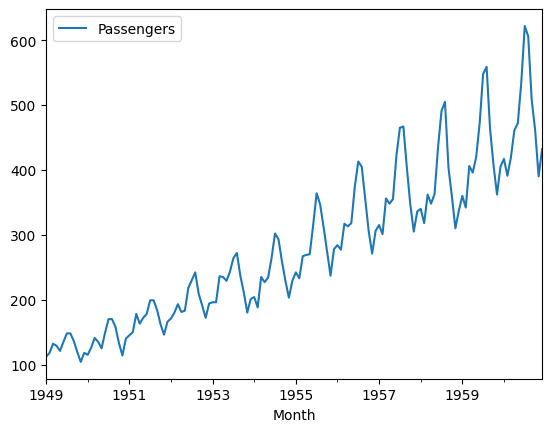

In [29]:
airline.plot();

**Info:**
* Based on this chart, it looks like the trend in the earlier days is increasing at a higher rate than just linear (although it is a  bit hard to tell from this one plot).

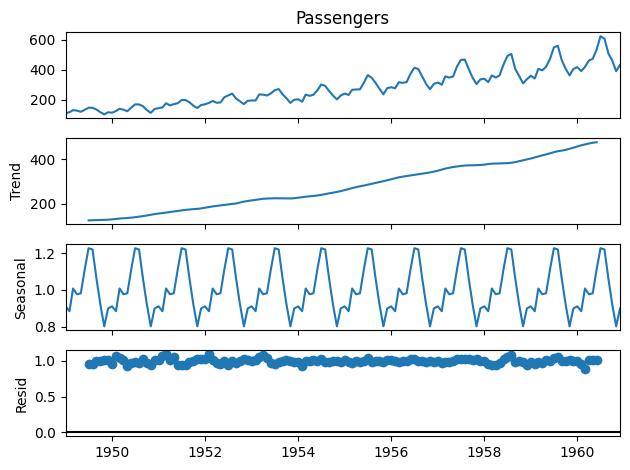

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(airline['Passengers'], model='multiplicative')  # model='mul' also works
result.plot();

**Info:**
* we can see the trend clearly going upwards.
* Also huge seasonality component involved.

### **2.4 Moving Averages**

**Simple Moving Average**

In [32]:
airline['6-month-SMA'] = airline['Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Passengers'].rolling(window=12).mean()
airline.head(15)

,Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


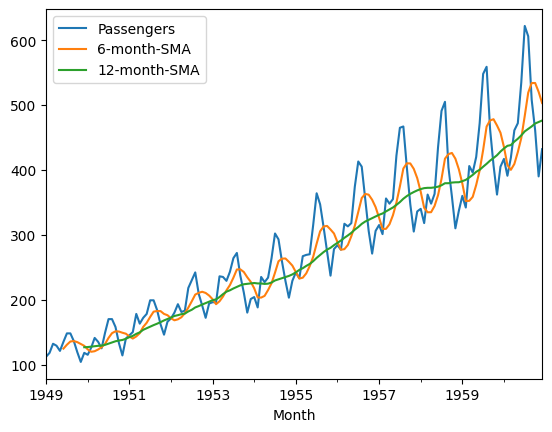

In [33]:
airline.plot();

**Exponentially moving Average**

We just showed how to calculate the SMA based on some window. However, basic SMA has some weaknesses:
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behavior, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an EWMA (**Exponentially weighted moving average**).

**Note:**
* EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name).
* The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
[Full details on Mathematics behind this can be found here](http://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows).

* Here is the shorter version of the explanation behind EWMA.

**The formula for EWMA is:**   
 $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

* Where $x_t$ is the input value,
* $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and
* $y_t$ is the output.

**Now the question is, how to we define the weight term $w_i$?**

This depends on the <tt>adjust</tt> parameter you provide to the <tt>.ewm()</tt> method.

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

**which gives**

 $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

**When <tt>adjust=False</tt> is specified, moving averages are calculated as:**

 $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

**which is equivalent to using weights:**

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

* When <tt>adjust=True</tt> we have $y_0=x_0$ and from the last representation above we have
  $y_t=\alpha x_t+(1−α)y_{t−1}$,
* therefore there is an assumption that $x_0$ is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

For the smoothing factor $\alpha$ one must have $0<\alpha≤1$, and while it is possible to pass <em>alpha</em> directly, it’s often easier to think about either the <em>span</em>, <em>center of mass</em> (com) or <em>half-life</em> of an EW moment:



\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}


* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

We have to pass precisely one of the above into the <tt>.ewm()</tt> function. For our data we'll use <tt>span=12</tt>.

In [34]:
airline['EWMA12'] = airline['Passengers'].ewm(span=12,adjust=False).mean()

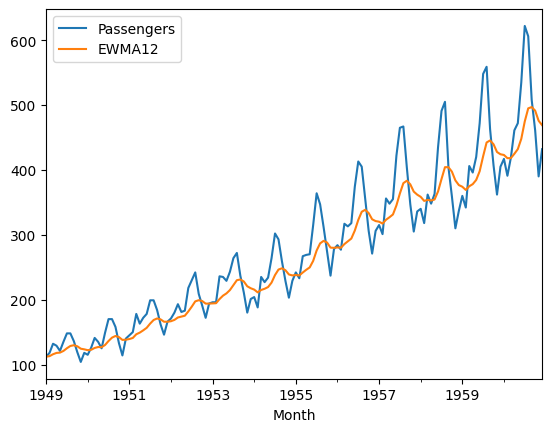

In [35]:
airline[['Passengers','EWMA12']].plot();

### **2.5 Comparing SMA to EWMA**

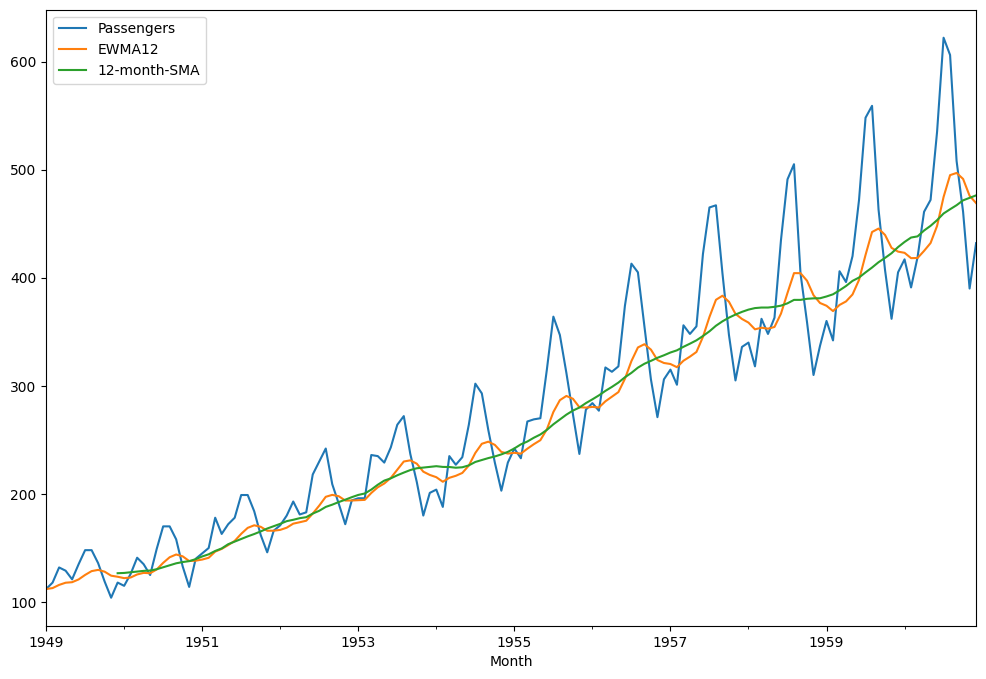

In [36]:
airline[['Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

**Simple Exponential Smoothing**

* The above example employed <em>Simple Exponential Smoothing</em> with one smoothing factor **α**.
* Unfortunately, this technique does a poor job of forecasting when there is a trend in the data as seen above

###**2.6 Holt-Winters Methods**
* we discussed  on <strong>Exponentially Weighted Moving Averages</strong> (EWMA) we applied <em>Simple Exponential Smoothing</em> using just one smoothing factor $\alpha$ (alpha).

* This failed to account for other contributing factors like trend and seasonality.

Now, we'll look at <em>Double</em> and <em>Triple Exponential Smoothing</em> with the <a href='https://otexts.com/fpp2/holt-winters.html'>Holt-Winters Methods</a>.

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

Because we haven't yet considered seasonal fluctuations, the forecasting model is simply a straight sloped line extending from the most recent data point. We'll see an example of this in upcoming lectures.

With <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Here $L$ represents the number of divisions per cycle. In our case looking at monthly data that displays a repeating pattern each year, we would use $L=12$.

In general, higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html'>statsmodels.tsa.holtwinters.SimpleExpSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;&nbsp;&nbsp;
Simple Exponential Smoothing<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html'>statsmodels.tsa.holtwinters.ExponentialSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;
    Holt-Winters Exponential Smoothing</tt>
    
<h3>For Further Reading:</h3>
<tt>
<strong>
<a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc43.htm'>NIST/SEMATECH e-Handbook of Statistical Methods</a></strong>&nbsp;&nbsp;<font color=black>What is Exponential Smoothing?</font></tt></div>

In [37]:
df = pd.read_csv('/content/drive/MyDrive/Python/Datasets/Time Series/airline-passengers.csv',index_col='Month',parse_dates=True)
df.dropna(inplace=True)
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

**Setting a DatetimeIndex Frequency**

* Note that our DatetimeIndex does not have a frequency.
* In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.).
* Since observations occur at the start of each month, we'll use MS.
* A full list of time series offset aliases can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here.

In [38]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

### **2.7 Simple Exponential Smoothing**

* A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing.
* It will be shown that it performs the same calculation of the weighted moving average as the pandas <tt>.ewm()</tt> method:<br>
$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

In [39]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['Passengers'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

,Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


### **2.8 Double Exponential Smoothing**
Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require <em>damping</em> that reduces the size of the trend over future periods until it reaches a flat line.

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Passengers,EWMA12,SES12,DESadd12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263


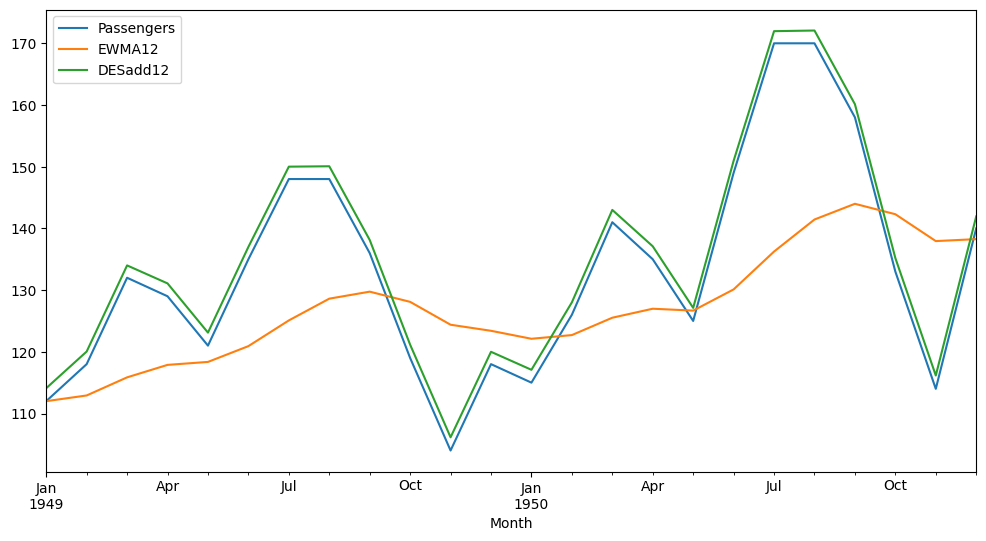

In [41]:
df[['Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

**Info:**
* Here we can see that Double Exponential Smoothing is a much better representation of the time series data.

**Let's see if using a multiplicative seasonal adjustment helps.**

In [42]:
df['DESmul12'] = ExponentialSmoothing(df['Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267


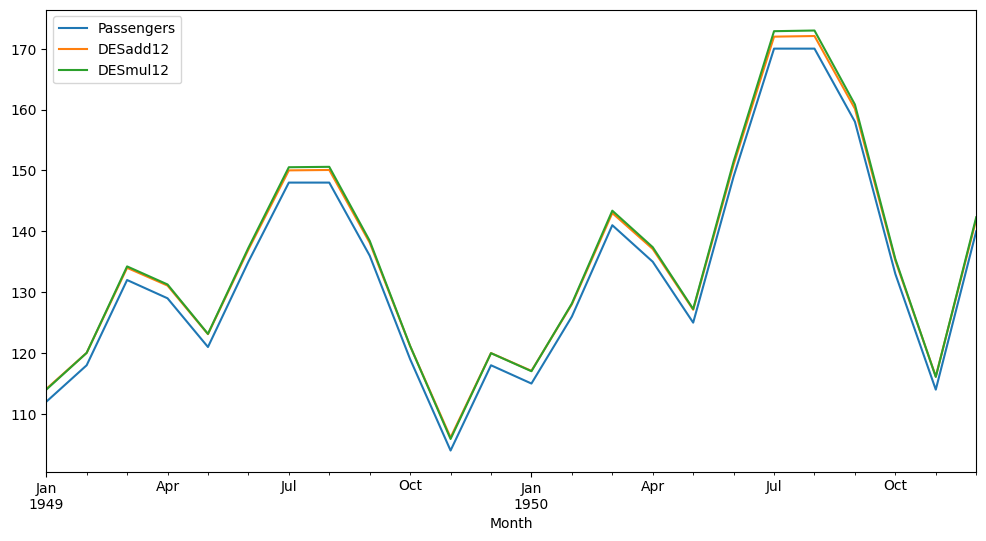

In [43]:
df[['Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

**Info:**
* Although minor, it does appear that a multiplicative adjustment gives better results.
* Note that the green line almost completely overlaps the original data.

# 3.**General Forecasting models**

### 3.1 **Forecasting with Holt-Winters method**

In [44]:
df = pd.read_csv('/content/drive/MyDrive/Python/Datasets/Time Series/airline-passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### **Train Test split**

In [45]:
train_data = df.iloc[:109] # Goes up to but not including 109
test_data = df.iloc[108:]

#### **Fitting the model**
    

In [46]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model=ExponentialSmoothing(train_data['Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [47]:
# Let's do the forecast. Ignore the warings as it is related to statsmodels
predictions=fitted_model.forecast(36).rename("Forecast")
predictions

1958-02-01    339.142914
1958-03-01    399.281625
1958-04-01    394.233547
1958-05-01    402.545191
1958-06-01    473.128655
1958-07-01    521.795218
1958-08-01    514.513539
1958-09-01    446.216769
1958-10-01    385.430905
1958-11-01    339.645052
1958-12-01    381.455595
1959-01-01    401.210077
1959-02-01    387.159065
1959-03-01    455.812268
1959-04-01    450.049478
1959-05-01    459.537892
1959-06-01    540.114624
1959-07-01    595.671442
1959-08-01    587.358816
1959-09-01    509.392531
1959-10-01    440.000550
1959-11-01    387.732296
1959-12-01    435.462413
1960-01-01    458.013752
1960-02-01    441.973385
1960-03-01    520.346568
1960-04-01    513.767878
1960-05-01    524.599670
1960-06-01    616.584526
1960-07-01    680.007127
1960-08-01    670.517593
1960-09-01    581.512772
1960-10-01    502.296214
1960-11-01    442.627774
1960-12-01    497.115563
1961-01-01    522.859740
Freq: MS, Name: Forecast, dtype: float64

<Axes: xlabel='Month'>

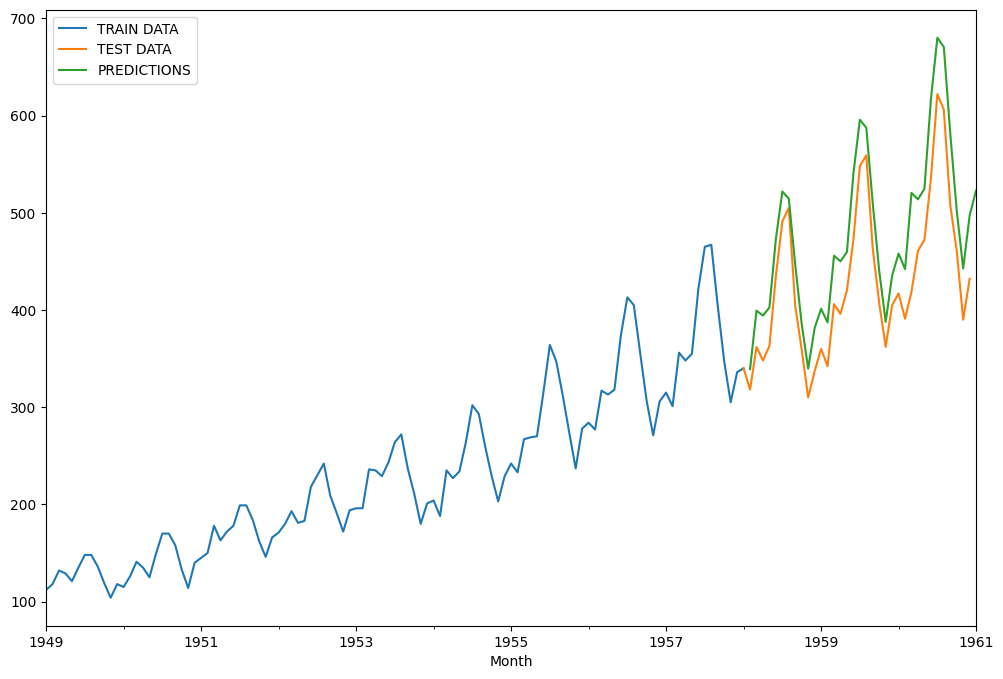

In [48]:
train_data['Passengers'].plot(legend=True, label="TRAIN DATA")
test_data['Passengers'].plot(legend=True, label="TEST DATA", figsize=(12,8))
predictions.plot(legend=True, label='PREDICTIONS')

<Axes: xlabel='Month'>

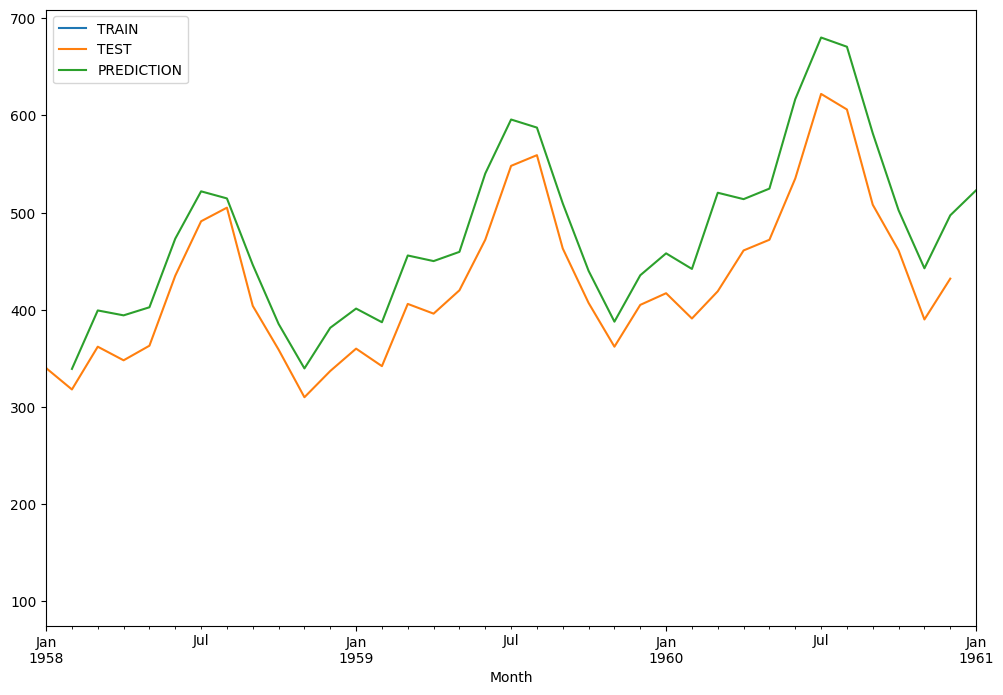

In [49]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01'])

### 3.2 **Evaluating predictions**

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [51]:
mean_absolute_error(test_data,predictions)

63.03104082299123

In [52]:
np.sqrt(mean_squared_error(test_data,predictions))

74.92820898138402

## 3.3 **Stationarity**

* Time series data is said to be **stationary** if it does **not** exhibit trends or seasonality.
* That is, fluctuations in the data are entirely due to outside forces and noise.
* The file **samples.csv** contains made-up datasets that illustrate stationary and non-stationary data.

****Stationary Vs Non Stationary****

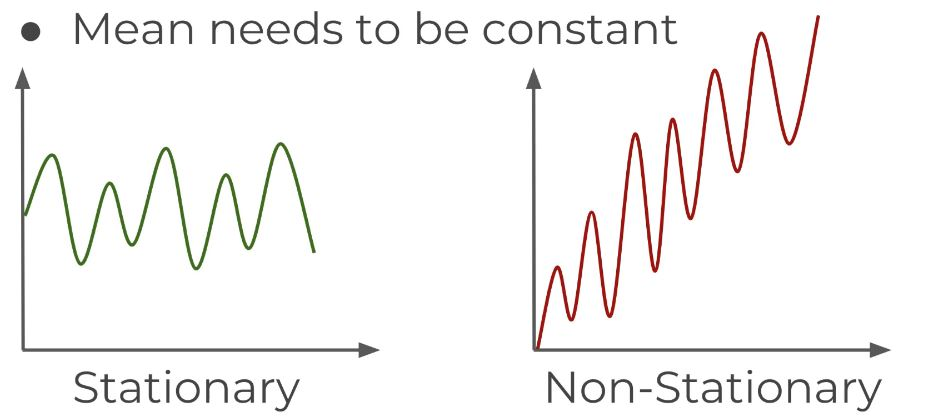

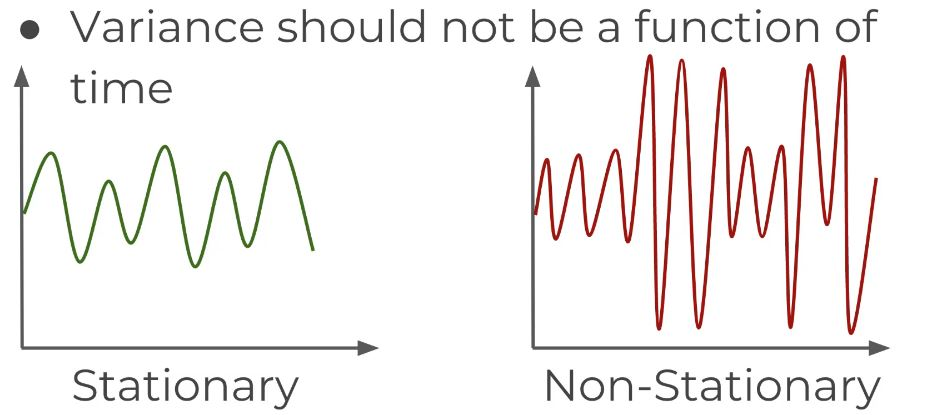

In [ ]:
df2 = pd.read_csv('../input/samples/samples.csv',index_col=0,parse_dates=True)
df2.head()

In [ ]:
df2['a'].plot(ylim=[0,100],title="STATIONARY DATA").autoscale(axis='x',tight=True);

In [ ]:
df2['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

## 3.4 **Differencing**
Non-stationary data can be made to look stationary through <em>differencing</em>. A simple differencing method calculates the difference between consecutive points.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.tools.diff.html'>statespace.tools.diff</a></strong><font color=black>(series[, k_diff, …])</font>&nbsp;&nbsp;Difference a series simply and/or seasonally along the zero-th axis.</tt></div>

In [53]:
from statsmodels.tsa.statespace.tools import diff
df2['d1'] = diff(df2['b'],k_diff=1)

df2['d1'].plot(title="FIRST DIFFERENCE DATA").autoscale(axis='x',tight=True);

NameError: ignored

## **3.5 ACF and PACF**
## Autocorrelation Function / Partial Autocorrelation Function
Before we can investigate <em>autoregression</em> as a modeling tool, we need to look at <em>covariance</em> and <em>correlation</em> as they relate to lagged (shifted) samples of a time series.


**Goals**
 * Be able to create ACF and PACF charts
 * Create these charts for multiple times series, one with seasonality and another without
 * Be able to calculate Orders PQD terms for ARIMA off these charts (highlight where they cross the x axis)

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acovf.html'>stattools.acovf</a></strong><font color=black>(x[, unbiased, demean, fft, …])</font>&nbsp;Autocovariance for 1D<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html'>stattools.acf</a></strong><font color=black>(x[, unbiased, nlags, qstat, …])</font>&nbsp;&nbsp;Autocorrelation function for 1d arrays<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf.html'>stattools.pacf</a></strong><font color=black>(x[, nlags, method, alpha])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Partial autocorrelation estimated<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf_yw.html'>stattools.pacf_yw</a></strong><font color=black>(x[, nlags, method])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Partial autocorrelation estimated with non-recursive yule_walker<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf_ols.html'>stattools.pacf_ols</a></strong><font color=black>(x[, nlags])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calculate partial autocorrelations</tt>
   
<h3>Related Plot Methods:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html'>tsaplots.plot_acf</a></strong><font color=black>(x)</font>&nbsp;&nbsp;&nbsp;Plot the autocorrelation function<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html'>tsaplots.plot_pacf</a></strong><font color=black>(x)</font>&nbsp;&nbsp;Plot the partial autocorrelation function</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://en.wikipedia.org/wiki/Autocovariance'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Autocovariance</font><br>
<strong>
<a href='https://otexts.com/fpp2/autocorrelation.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autocorrelation</font><br>
<strong>
<a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4463.htm'>NIST Statistics Handbook</a></strong>&nbsp;&nbsp;<font color=black>Partial Autocorrelation Plot</font></div>


In [54]:
# Load a non-stationary dataset
df1 = pd.read_csv('/content/drive/MyDrive/Python/Datasets/Time Series/airline-passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('/content/drive/MyDrive/Python/Datasets/Time Series/daily-total-female-births.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [55]:
# Import the models
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [56]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **3.6 Autocovariance for 1D**
In a <em>deterministic</em> process, like $y=sin(x)$, we always know the value of $y$ for a given value of $x$. However, in a <em>stochastic</em> process there is always some randomness that prevents us from knowing the value of $y$. Instead, we analyze the past (or <em>lagged</em>) behavior of the system to derive a probabilistic estimate for $\hat{y}$.

One useful descriptor is <em>covariance</em>. When talking about dependent and independent $x$ and $y$ variables, covariance describes how the variance in $x$ relates to the variance in $y$. Here the size of the covariance isn't really important, as $x$ and $y$ may have very different scales. However, if the covariance is positive it means that $x$ and $y$ are changing in the same direction, and may be related.

With a time series, $x$ is a fixed interval. Here we want to look at the variance of $y_t$ against lagged or shifted values of $y_{t+k}$

For a stationary time series, the autocovariance function for $\gamma$ (gamma) is given as:

${\displaystyle {\gamma}_{XX}(t_{1},t_{2})=\operatorname {Cov} \left[X_{t_{1}},X_{t_{2}}\right]=\operatorname {E} [(X_{t_{1}}-\mu _{t_{1}})(X_{t_{2}}-\mu _{t_{2}})]}$

We can calculate a specific $\gamma_k$ with:

${\displaystyle \gamma_k = \frac 1 n \sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})}$

**Autocovariance Example:**

Say we have a time series with five observations: {13, 5, 11, 12, 9}.<br>
We can quickly see that $n = 5$, the mean $\bar{y} = 10$, and we'll see that the variance $\sigma^2 = 8$.<br>
The following calculations give us our covariance values:
<br><br>
$\gamma_0 = \frac {(13-10)(13-10)+(5-10)(5-10)+(11-10)(11-10)+(12-10)(12-10)+(9-10)(9-10)} 5 = \frac {40} 5 = 8.0 \\
\gamma_1 = \frac {(13-10)(5-10)+(5-10)(11-10)+(11-10)(12-10)+(12-10)(9-10)} 5 = \frac {-20} 5 = -4.0 \\
\gamma_2 = \frac {(13-10)(11-10)+(5-10)(12-10)+(11-10)(9-10)} 5 = \frac {-8} 5 = -1.6 \\
\gamma_3 = \frac {(13-10)(12-10)+(5-10)(9-10)} 5 = \frac {11} 5 = 2.2 \\
\gamma_4 = \frac {(13-10)(9-10)} 5 = \frac {-3} 5 = -0.6$
<br><br>
Note that $\gamma_0$ is just the population variance $\sigma^2$

Let's see if statsmodels gives us the same results! For this we'll create a <strong>fake</strong> dataset:

In [57]:
df = pd.DataFrame({'a':[13, 5, 11, 12, 9]})
arr = acovf(df['a'])
arr

array([ 8. , -4. , -1.6,  2.2, -0.6])

**Unbiased Autocovariance**

Note that the number of terms in the calculations above are decreasing.<br>Statsmodels can return an "unbiased" autocovariance where instead of dividing by $n$ we divide by $n-k$.

$\gamma_0 = \frac {(13-10)(13-10)+(5-10)(5-10)+(11-10)(11-10)+(12-10)(12-10)+(9-10)(9-10)} {5-0} = \frac {40} 5 = 8.0 \\
\gamma_1 = \frac {(13-10)(5-10)+(5-10)(11-10)+(11-10)(12-10)+(12-10)(9-10)} {5-1} = \frac {-20} 4 = -5.0 \\
\gamma_2 = \frac {(13-10)(11-10)+(5-10)(12-10)+(11-10)(9-10)} {5-2} = \frac {-8} 3 = -2.67 \\
\gamma_3 = \frac {(13-10)(12-10)+(5-10)(9-10)} {5-3} = \frac {11} 2 = 5.5 \\
\gamma_4 = \frac {(13-10)(9-10)} {5-4} = \frac {-3} 1 = -3.0$

In [59]:
arr2 = acovf(df['a'],unbiased=True)
arr2

array([ 8.        , -5.        , -2.66666667,  5.5       , -3.        ])

## **3.7 Autocorrelation for 1D**
The correlation $\rho$ (rho) between two variables $y_1,y_2$ is given as:

### $\rho = \frac {\operatorname E[(y_1−\mu_1)(y_2−\mu_2)]} {\sigma_{1}\sigma_{2}} = \frac {\operatorname {Cov} (y_1,y_2)} {\sigma_{1}\sigma_{2}}$,

where $E$ is the expectation operator, $\mu_{1},\sigma_{1}$ and $\mu_{2},\sigma_{2}$ are the means and standard deviations of $y_1$ and $y_2$.

When working with a single variable (i.e. <em>autocorrelation</em>) we would consider $y_1$ to be the original series and $y_2$ a lagged version of it. Note that with autocorrelation we work with $\bar y$, that is, the full population mean, and <em>not</em> the means of the reduced set of lagged factors (see note below).

Thus, the formula for $\rho_k$ for a time series at lag $k$ is:

${\displaystyle \rho_k = \frac {\sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})} {\sum\limits_{t=1}^{n} (y_t - \bar{y})^2}}$

This can be written in terms of the covariance constant $\gamma_k$ as:

${\displaystyle \rho_k = \frac {\gamma_k n} {\gamma_0 n} = \frac {\gamma_k} {\sigma^2}}$

For example,<br>
$\rho_4 = \frac {\gamma_4} {\sigma^2} = \frac{-0.6} {8} = -0.075$

Note that ACF values are bound by -1 and 1. That is, ${\displaystyle -1 \leq \rho_k \leq 1}$

In [60]:
arr3 = acf(df['a'])
arr3

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

## **3.8 Partial Autocorrelation**
Partial autocorrelations measure the linear dependence of one variable after removing the effect of other variable(s) that affect both variables. That is, the partial autocorrelation at lag $k$ is the autocorrelation between $y_t$ and $y_{t+k}$ that is not accounted for by lags $1$ through $k−1$.

A common method employs the non-recursive <a href='https://en.wikipedia.org/wiki/Autoregressive_model#Calculation_of_the_AR_parameters'>Yule-Walker Equations</a>:

$\phi_0 = 1\\
\phi_1 = \rho_1 = -0.50\\
\phi_2 = \frac {\rho_2 - {\rho_1}^2} {1-{\rho_1}^2} = \frac {(-0.20) - {(-0.50)}^2} {1-{(-0.50)}^2}= \frac {-0.45} {0.75} = -0.60$

As $k$ increases, we can solve for $\phi_k$ using matrix algebra and the <a href='https://en.wikipedia.org/wiki/Levinson_recursion'>Levinson–Durbin recursion</a> algorithm which maps the sample autocorrelations $\rho$ to a <a href='https://en.wikipedia.org/wiki/Toeplitz_matrix'>Toeplitz</a> diagonal-constant matrix. The full solution is beyond the scope of this course, but the setup is as follows:


$\displaystyle \begin{pmatrix}\rho_0&\rho_1&\cdots &\rho_{k-1}\\
\rho_1&\rho_0&\cdots &\rho_{k-2}\\
\vdots &\vdots &\ddots &\vdots \\
\rho_{k-1}&\rho_{k-2}&\cdots &\rho_0\\
\end{pmatrix}\quad \begin{pmatrix}\phi_{k1}\\\phi_{k2}\\\vdots\\\phi_{kk}\end{pmatrix}
\mathbf = \begin{pmatrix}\rho_1\\\rho_2\\\vdots\\\rho_k\end{pmatrix}$

In [61]:
arr4 = pacf_yw(df['a'],nlags=4,method='mle')
arr4

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

In [62]:
arr5 = pacf_yw(df['a'],nlags=4,method='unbiased')
arr5

ValueError: ignored

## **3.9 Plotting**

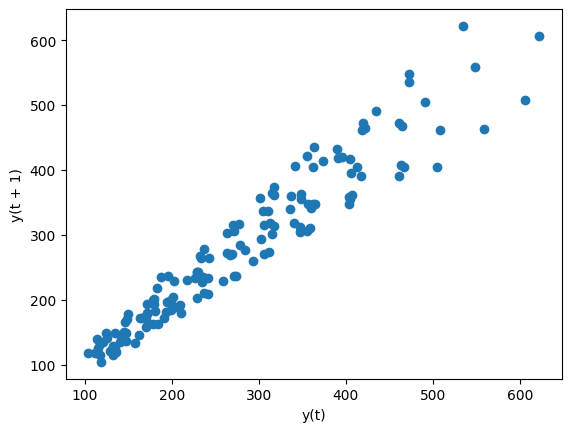

In [63]:
from pandas.plotting import lag_plot

lag_plot(df1['Passengers']);

**Info:**
* Clearly there is a strong correlation between y and it's lagged values.
* Hence it is not stationary.

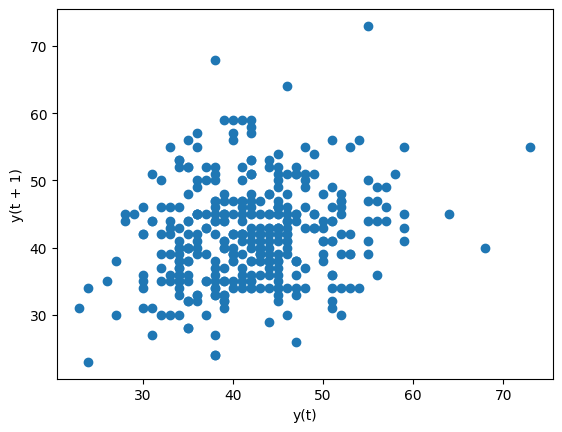

In [64]:
lag_plot(df2['Births']);

**Info:**
* There is little evidence of autocorrelation here.

## **3.10 ACF plots**

In [65]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [66]:
# Let's look first at the ACF array. By default acf() returns 40 lags
acf(df2['Births'])

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825])

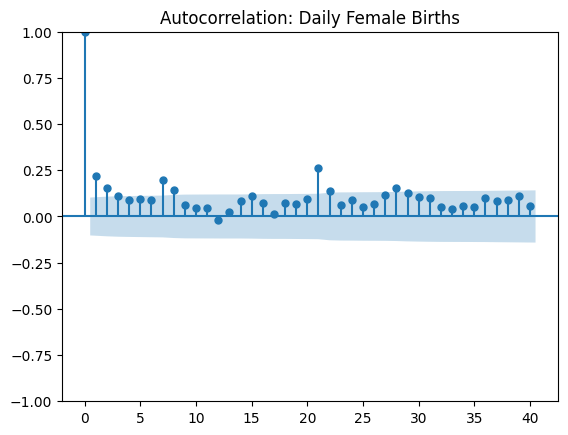

In [67]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: Daily Female Births'
lags = 40
plot_acf(df2,title=title,lags=lags);

**Info:**
* This is a typical ACF plot for stationary data, with lags on the horizontal axis and correlations on the vertical axis.
* The first value $y_0$ is always 1.
* A sharp dropoff indicates that there is no AR component in the ARIMA model.

Next we'll look at non-stationary data with the <strong>Airline Passengers</strong> dataset:

In [68]:
acf(df1['Passengers'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

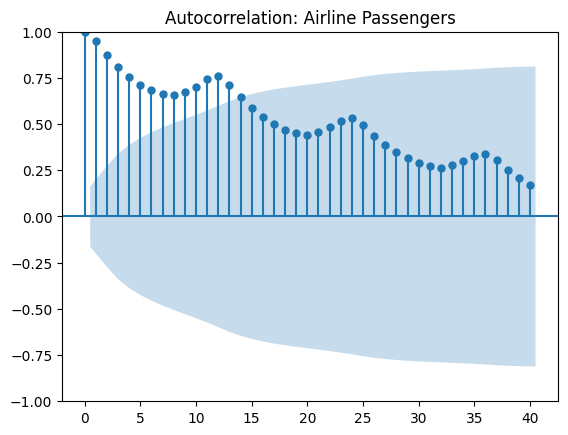

In [69]:
title = 'Autocorrelation: Airline Passengers'
lags = 40
plot_acf(df1,title=title,lags=lags);

**Info:**
* Non stationary data as there are no. of lags before ACF values drop off

### **Tests for Stationarity**
A time series is <em>stationary</em> if the mean and variance are fixed between any two equidistant points. That is, no matter where you take your observations, the results should be the same. A times series that shows seasonality is <em>not</em> stationary.

A test for stationarity usually involves a <a href='https://en.wikipedia.org/wiki/Unit_root_test'>unit root</a> hypothesis test, where the null hypothesis $H_0$ is that the series is <em>nonstationary</em>, and contains a unit root. The alternate hypothesis $H_1$ supports stationarity. The <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller</a> and <a href='https://en.wikipedia.org/wiki/KPSS_test'>Kwiatkowski-Phillips-Schmidt-Shin</a> tests are stationarity tests.

### **Augmented Dickey-Fuller Test**
To determine whether a series is stationary we can use the <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller Test</a>. In this test the null hypothesis states that $\phi = 1$ (this is also called a unit test). The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value ($p<0.05$) indicates strong evidence against the null hypothesis.

To demonstrate, we'll use a dataset we know is <em>not</em> stationary, the airline_passenger dataset. First, let's plot the data along with a 12-month rolling mean and standard deviation:

In [71]:
# Load a seasonal dataset
df1 = pd.read_csv('/content/drive/MyDrive/Python/Datasets/Time Series/airline-passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a nonseasonal dataset
df2 = pd.read_csv('/content/drive/MyDrive/Python/Datasets/Time Series/daily-total-female-births.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

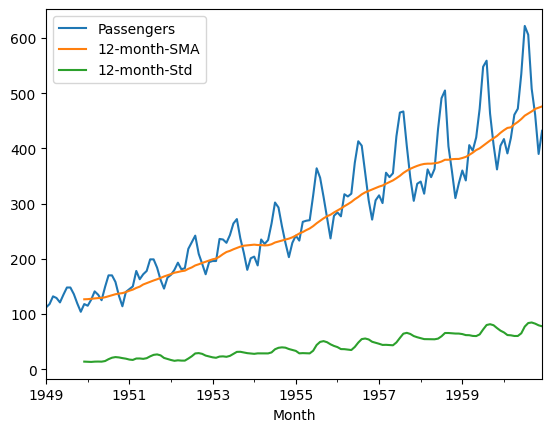

In [72]:
df1['12-month-SMA'] = df1['Passengers'].rolling(window=12).mean()
df1['12-month-Std'] = df1['Passengers'].rolling(window=12).std()

df1[['Passengers','12-month-SMA','12-month-Std']].plot();

In [73]:
from statsmodels.tsa.stattools import adfuller
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(df1['Passengers'],autolag='AIC')
dftest

Augmented Dickey-Fuller Test on Airline Data


(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [74]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : {None, int}
        Maximum lag which is included in test, default value of
        12*(nobs/100)^{1/4} is used when ``None``.
    regression : {"c","ct","ctt","n"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "n" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
      

In [75]:
print('Augmented Dickey-Fuller Test on Airline Data')

dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Airline Data
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


**Info:**
* Our Null hypotheses in Adfuller test is that Data is NON STATIONARY p-value is greater than 0.05 hence we fail to reject the null hypothesis.
* Hence data is non stationary.

### **Exposing Seasonality with Month and Quarter Plots**
Statsmodels has two plotting functions that group data by month and by quarter. Note that if the data appears as months, you should employ <em>resampling</em> with an aggregate function before running a quarter plot. These plots return a <tt>matplotlib.Figure</tt> object.
<div class="alert alert-info"><h3>Related Plot Methods:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.month_plot.html'>tsaplots.month_plot</a></strong><font color=black>(x)</font>&nbsp;&nbsp;&nbsp;&nbsp;Seasonal plot of monthly data<br>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.quarter_plot.html'>tsaplots.quarter_plot</a></strong><font color=black>(x)</font>&nbsp;&nbsp;Seasonal plot of quarterly data</tt>
</div>

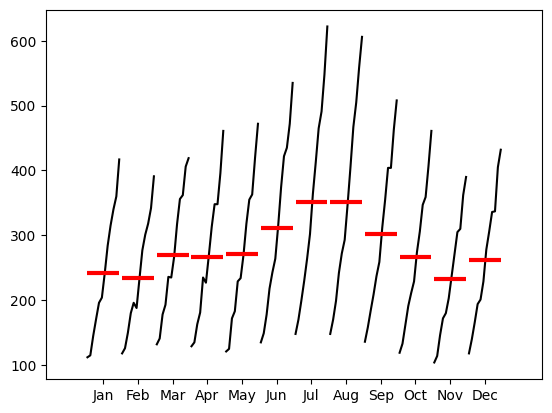

In [76]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

# Note: add a semicolon to prevent two plots being displayed in jupyter
month_plot(df1['Passengers']);

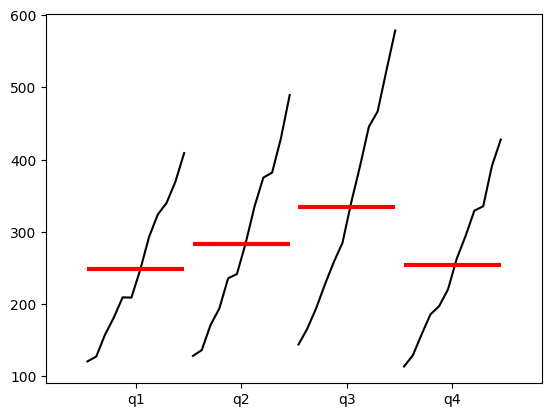

In [77]:
dfq = df1['Passengers'].resample(rule='Q').mean()

quarter_plot(dfq);

# **4.Introduction to ARIMA Models**
Let's study variety of models

<strong>ARIMA</strong>, or <em>Autoregressive Integrated Moving Average</em> is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

<strong>Moving Averages</strong> we've already seen with EWMA and the Holt-Winters Method.<br>
<strong>Integration</strong> will apply differencing to make a time series stationary, which ARIMA requires.<br>
<strong>Autoregression</strong> is explained in detail in the next section. Here we're going to correlate a current time series with a lagged version of the same series.<br>
Once we understand the components, we'll investigate how to best choose the $p$, $d$ and $q$ values required by the model.

# **Choosing ARIMA orders (p, d, q)**

**Info:**
* Manually checking ACF and PACF plots to find best p, d, q can be confusing and difficult,
* hence it is advisable to use pyramid arima library (pmdarima) which will perform gridsearch to find the best combination of p, d and q.

In [79]:
# Load a non-stationary dataset
df1 = pd.read_csv('/content/drive/MyDrive/Python/Datasets/Time Series/airline-passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('/content/drive/MyDrive/Python/Datasets/Time Series/daily-total-female-births.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

#### **pmdarima**

In [80]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.3 MB/s eta 0:00:00


In [81]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [82]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


#### **Checking non stationary data**

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

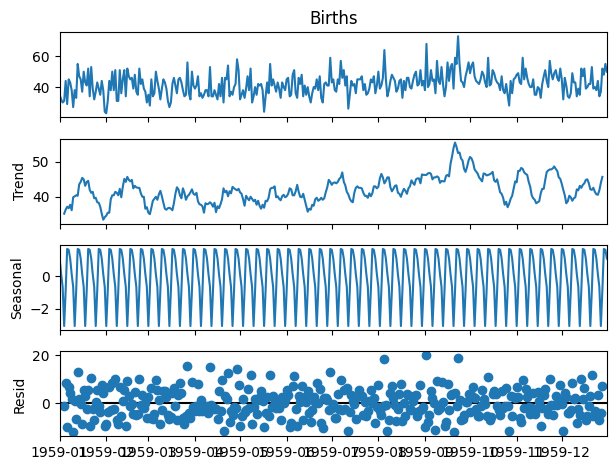

In [84]:
seasonal_decompose(df2['Births']).plot();

**Info:**
* As seen above, seasonal graph has very small range suggesting no or very low seasonality.

In [85]:
auto_arima(df2['Births'],error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Wed, 04 Oct 2023   AIC                           2459.074
Time:                        06:26:36   BIC                           2470.766
Sample:                    01-01-1959   HQIC                          2463.721
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Info:**
* This shows a recommended (p,d,q) ARIMA Order of (1,1,1), with no seasonal_order component

In [86]:
arima_model=auto_arima(df2['Births'], start_p=0, start_q=0, d=None, seasonal=False, max_p=5, max_q=5, error_action='ignore', stepwise=True, suppress_warnings=True)

In [87]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Wed, 04 Oct 2023   AIC                           2459.074
Time:                        06:27:24   BIC                           2470.766
Sample:                    01-01-1959   HQIC                          2463.721
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# **ARIMA**

In [88]:
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders


df2 = pd.read_csv('/content/drive/MyDrive/Python/Datasets/Time Series/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'

[Text(0.5, 0, ''), Text(0, 0.5, 'Chained 2012 Dollars')]

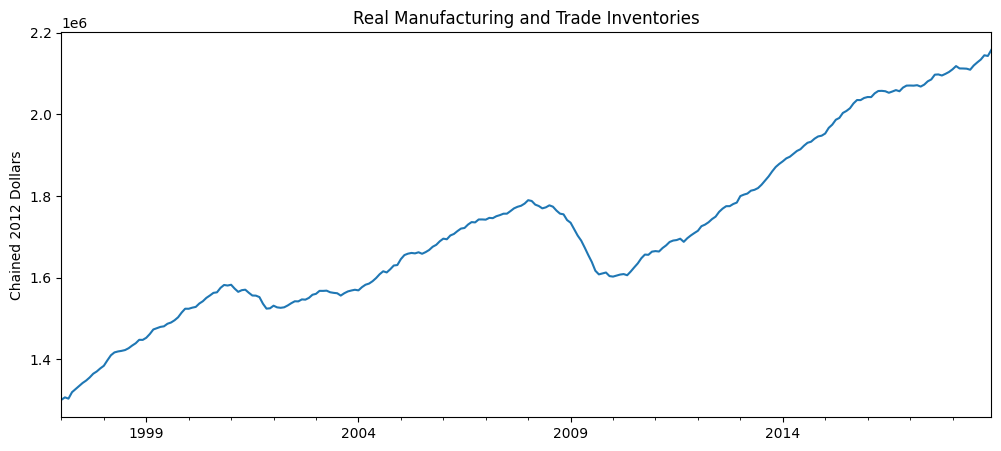

In [89]:
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = df2['Inventories'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


### **Let's run an ETS decomposition**

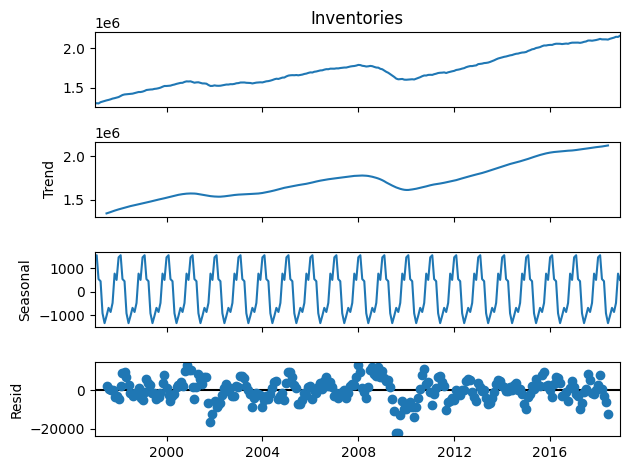

In [90]:
result=seasonal_decompose(df2['Inventories'], model='additive').plot()

**Info:**
* As it can be seen that seasonal component range is very low as compared to trend,
* hence we will consider this as non seasonal data

### **auto_arima to determine ARIMA orders**

In [91]:
auto_arima(df2['Inventories'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Wed, 04 Oct 2023   AIC                           5348.037
Time:                        06:32:14   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Info:**
* Orders are (0,1,0)

* As per auto arima, d=1 so let's check if difference with first order shift is stationary or not.

<Axes: xlabel='Date'>

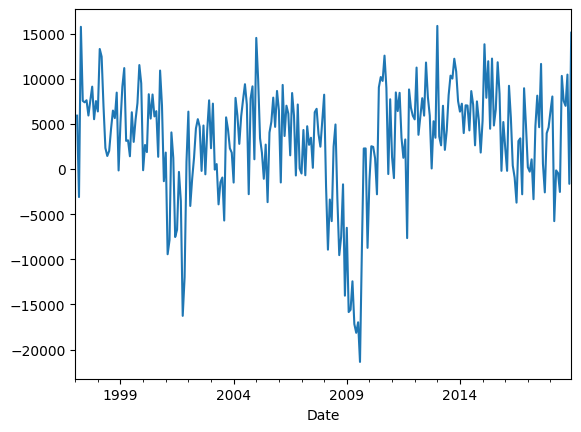

In [92]:
(df2['Inventories']-df2['Inventories'].shift(1)).plot()

**Info:**
* As seen above, result is stationary

In [93]:
model_arima_1 = auto_arima(df2['Inventories'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

model_arima_1.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=1.30 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.086 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Wed, 04 Oct 2023   AIC                           5348.037
Time:                        06:33:35   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **Split the test into train and test set**

In [94]:
len(df2)

264

In [95]:
# Set one year for testing
train = df2.iloc[:252]
test = df2.iloc[252:]

**Fit the ARIMA model**

* Let's use 1,1,1 order as auto arima selected 0,1,0
* due to early stopping but it seems 1,1,1 is much better

In [103]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Inventories'], order=(1,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2593.520
Date:                Wed, 04 Oct 2023   AIC                           5193.041
Time:                        06:47:50   BIC                           5203.629
Sample:                    01-01-1997   HQIC                          5197.301
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.695e+06   1.26e-12   1.34e+18      0.000    1.69e+06    1.69e+06
ar.L1          0.9998      0.002    418.026      0.000       0.995       1.005
sigma2      4.928e+07   5.09e-14   9.68e+20      0.000    4.93e+07    4.93e+07
===================================================================================
Ljung-Box (L1) (Q):                  84.99   Jarque-Bera (JB):               100.59
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -1.18
Prob(H) (two-sided):                  0.62   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [104]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1


In [105]:
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,1) Predictions')

[Text(0.5, 0, ''), Text(0, 0.5, 'Chained 2012 Dollars')]

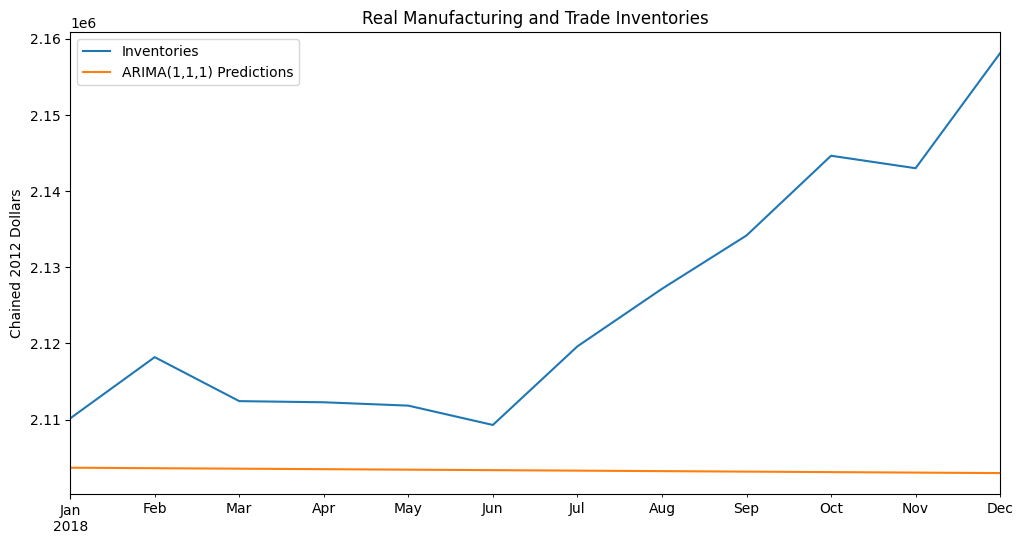

In [106]:
ax = test['Inventories'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


### **Run the model on the full dataset and forecast the future**

In [107]:
model = ARIMA(df2['Inventories'],order=(1,1,1))
results = model.fit()
fcast = results.predict(len(df2),len(df2)+11,typ='levels').rename('ARIMA(1,1,1) Forecast')

[Text(0.5, 0, ''), Text(0, 0.5, 'Chained 2012 Dollars')]

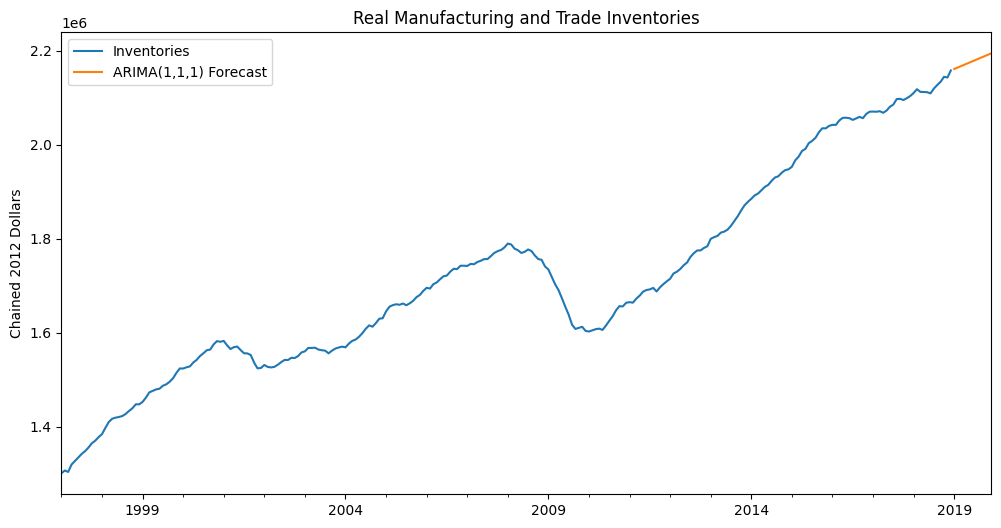

In [108]:
ax = df2['Inventories'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

# **SARIMAX**

In [109]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [118]:
df=pd.read_csv('/content/drive/MyDrive/Python/Datasets/Time Series/co2_mm_mlo.csv')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [119]:
# let's create a datetime column
df['Date']=pd.to_datetime({'year': df['year'], 'month': df['month'], 'day':1})

In [120]:
df=df.set_index('Date')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 1958-03-01 to 2018-11-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          729 non-null    int64  
 1   month         729 non-null    int64  
 2   decimal_date  729 non-null    float64
 3   average       722 non-null    float64
 4   interpolated  729 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 34.2 KB


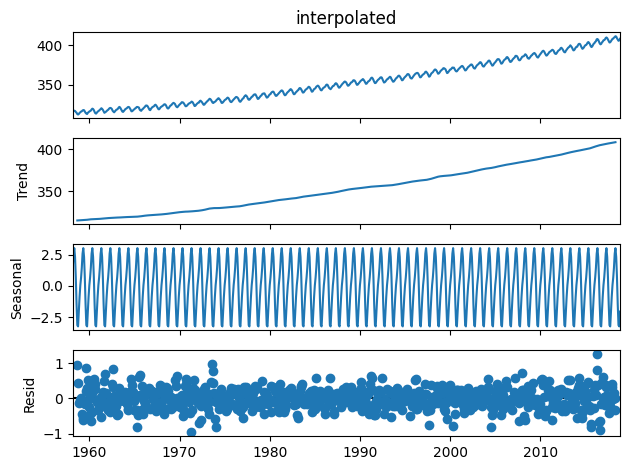

In [122]:
seasonal_check=seasonal_decompose(df['interpolated'], model='add').plot()

**Info:**
* Very clear seasonality observed as per above graph

In [123]:
auto_arima(df['interpolated'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.256
Date:                            Wed, 04 Oct 2023   AIC                            424.512
Time:                                    07:04:18   BIC                            452.053
Sample:                                03-01-1958   HQIC                           435.139
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3509      0.104      3.363      0.001       0.146       0.555
ar.L2          0.0868      0.059      1.483      0.138      -0.028       0.201
ma.L1         -0.7060      0.107     -6.607      0.000      -0.915      -0.497
ar.S.L12       0.9996      0.000   2924.672      0.000       0.999       1.000
ma.S.L12      -0.8659      0.021    -40.954      0.000      -0.907      -0.824
sigma2         0.0957      0.005     20.447      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.45
Prob(Q):                              0.79   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [124]:
len(df)

729

In [125]:
train=df.iloc[:717]
test=df.iloc[717:]

In [126]:
model=SARIMAX(train['interpolated'], order=(2,1,1), seasonal_order=(1,0,1,12) )

In [127]:
results=model.fit()

In [128]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.901
Date:                            Wed, 04 Oct 2023   AIC                            415.801
Time:                                    07:04:58   BIC                            443.243
Sample:                                03-01-1958   HQIC                           426.398
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3469      0.071      4.864      0.000       0.207       0.487
ar.L2          0.0814      0.021      3.884      0.000       0.040       0.122
ma.L1         -0.7019      0.059    -11.958      0.000      -0.817      -0.587
ar.S.L12       0.9996      0.000   2867.395      0.000       0.999       1.000
ma.S.L12      -0.8650      0.023    -38.250      0.000      -0.909      -0.821
sigma2         0.0951      0.005     20.412      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.65
Prob(Q):                              0.82   Prob(JB):                         0.10
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Let's create some predictions**

In [129]:
start=len(train)
end=len(train)+len(test)-1

In [130]:
predictions=results.predict(start, end, typ='levels').rename("SARIMA predictions")

<Axes: xlabel='Date'>

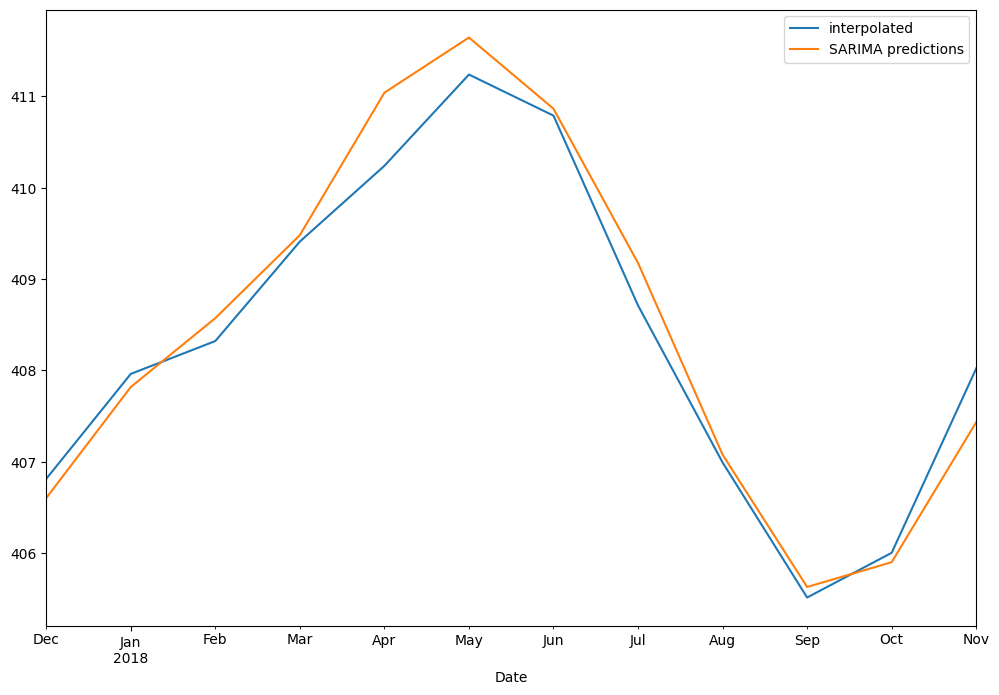

In [131]:
test['interpolated'].plot(legend=True, figsize=(12,8))
predictions.plot(legend=True)